In [531]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [532]:
data_train=pd.read_csv('train.csv')
y_train=data_train.accepted
x_train=data_train.drop(['accepted','condidatId'],axis=1 )
data_test=pd.read_csv('test.csv')
x_test=data_test.drop('condidatId',axis=1)








In [533]:
x_train.fillna(0.0, inplace=True)
x_test.fillna(0.0,inplace=True)


In [534]:
print(x_train)

     diplome  interview   Age experience
0      False          2  39.0      False
1      False          2  24.0      False
2      False          2  58.0       True
3      False          2  33.0      False
4      False          2  16.0      False
...      ...        ...   ...        ...
4272   False          2  42.0      False
4273   False          2  28.0      False
4274   False          2  43.0      False
4275   False          1  55.0       True
4276   False          2  21.0      False

[4277 rows x 4 columns]


In [535]:
x_test

,diplome,interview,Age,experience
0,True,2,27.0,False
1,False,2,19.0,False
2,True,0,31.0,False
3,False,2,38.0,False
4,False,2,20.0,False
...,...,...,...,...
4272,True,2,34.0,False
4273,False,2,42.0,False
4274,True,0,0.0,False
4275,False,3,0.0,False


In [536]:
knn =KNeighborsClassifier(3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [537]:
knn.score(x_train,y_train)

0.6946457797521627

In [538]:
y_pred=knn.predict(x_test)

In [539]:
acc= metrics.balanced_accuracy_score(y_train,y_pred)
print(acc)

0.5003770739064857


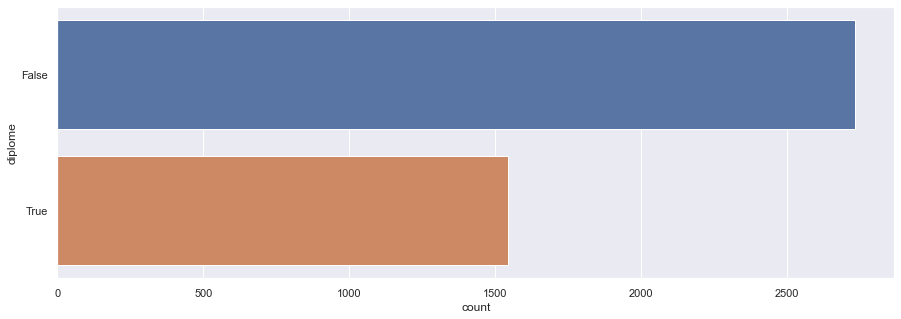

In [540]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'diplome' , data = x_test)
plt.show()

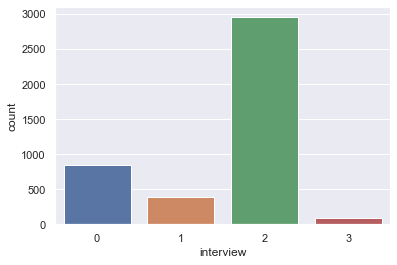

In [542]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="interview", data=x_test)
# 0 mauvais
# 1 pas mal 
# 2 bon 
# 4 tres bon 


In [543]:
df=pd.DataFrame({'acceptance': y_pred})

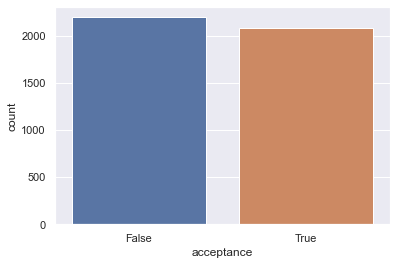

In [544]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="acceptance", data=df)

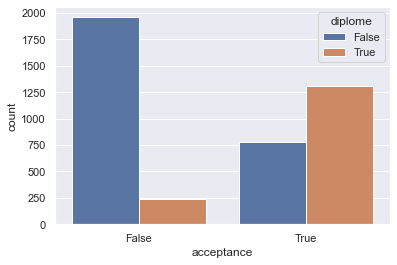

In [545]:
df_ax=pd.DataFrame({'diplome' : x_test.diplome ,'acceptance': y_pred})
ax = sns.countplot(x="acceptance", hue="diplome", data=df_ax)



In [546]:
age_20 =[]
age_30=[]
age_40=[]
age_50=[]


for i in x_test.Age : 
    if (i>=20 and i<30) :
     age_20.append(i)
    elif (i>=30 and i<40) :
     age_30.append(i)
    elif(i>=40 and i<50) : 
     age_40.append(i) 
    elif (i>=50 and i<60) : 
     age_50.append(i)
    


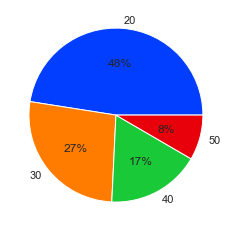

In [547]:
data =[age_20.__len__(),age_30.__len__(), age_40.__len__(),age_50.__len__()]
labels = ['20', '30', '40', '50']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()

In [548]:
dl =df.loc[df['acceptance'] ==False]


In [549]:
resultat=pd.DataFrame([x_test.diplome,x_test.interview,x_test.Age,x_test.experience,y_pred])

In [550]:
data = {'condidatId':data_test.condidatId ,
        'diplome': data_test.diplome,
         'interview' : data_test.interview,
         'Age'  :data_test.Age ,
         'experience' : data_test.experience,
         'acceptance'  : dl.acceptance                 }

In [551]:
candidat_non_accepté=pd.DataFrame(data)

In [552]:
candidat_non_accepté.dropna()

,condidatId,diplome,interview,Age,experience,acceptance
1,0018_01,False,2,19.0,False,False
3,0021_01,False,2,38.0,False,False
4,0023_01,False,2,20.0,False,False
5,0027_01,False,2,31.0,False,False
7,0032_01,True,2,20.0,False,False
...,...,...,...,...,...,...
4264,9249_01,False,2,21.0,False,False
4268,9262_01,False,0,20.0,False,False
4270,9265_01,False,2,43.0,False,False
4271,9266_01,False,2,40.0,False,False


candidat_non_accepté.to_csv("candidat_non_accepté.csv")

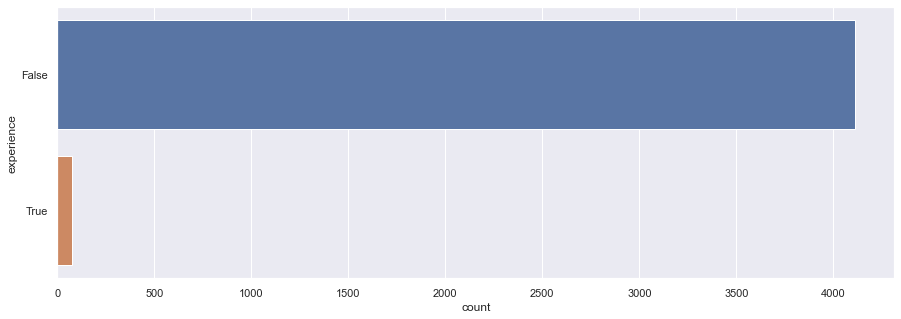

In [554]:
fplt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'experience' , data =candidat_non_accepté )
plt.show()

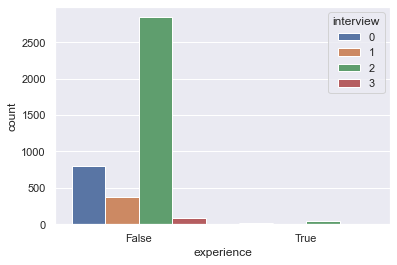

In [555]:
ax = sns.countplot(x="experience", hue="interview", data=candidat_non_accepté)

In [556]:
post_orientation = []
for i in candidat_non_accepté.experience : 
    if ((i) == 'False') :
        post_orientation.append('senior')
    else :
         post_orientation.append('junior')



In [557]:
candidat_non_accepté.insert(6,'post_orientation',post_orientation)

In [560]:
candidat_non_accepté.to_csv("orientation de non_affecté.csv")